In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

**Exercise 6.10:** Consider the equation $x = 1 - e^{-c x}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.  

a) Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$.  

b) Modify your program to calculate the solution for values of $c$ from $0$ to $3$ in steps of $0.01$ and make a plot of $x$ as a function of $c$. You should see a clear transition from a regime in which $x=0$ to a regime of nonzero $x$.

0.864665
0.822597
0.807025
0.800920
0.798475
0.797487
0.797086
0.796923
0.796857
0.796831
0.796820
0.796815
0.796813

Converges to 0.796813 with error tolerance of 1e-06.


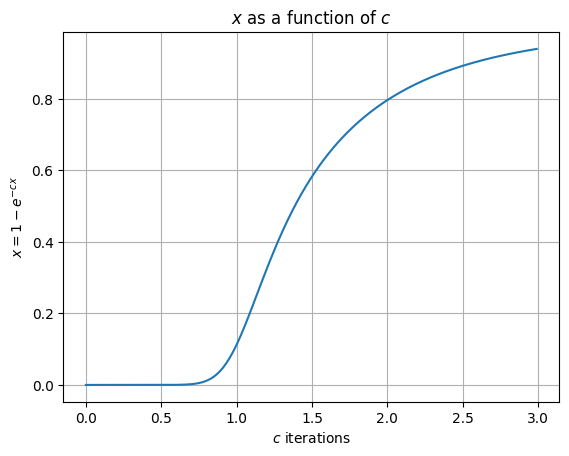

In [2]:
# 6.10a ---------------------------------------------------
def function_610(x_i, c=2):
    return 1 - exp(-c*x_i)

# Relaxation method
# x = initial guess
# f = function
# etol = error tolerance
def relaxation(f, x, etol):
    while np.abs((f(x)-x)/f(x)) > etol:
        x = f(x)
        print(f"{x:.6f}")
    print(f"\nConverges to {x:.6f} with error tolerance of {etol}.")
    
x = 1 # initial guess
etol=1e-6 # define tolerance
relaxation(function_610, x, etol)

# 6.10b ---------------------------------------------------
c_iter = np.arange(0, 3, 0.01).tolist()
x = [1]*len(c_iter)
for i, c in enumerate(c_iter):
    for _ in range(15):
        x[i] = 1 - np.exp(-c * x[i])

# Plot
plt.plot(c_iter, x)
plt.grid()
plt.ylabel("$x = 1 - e^{-c x}$")
plt.xlabel("$c$ iterations")
plt.title("$x$ as a function of $c$")
plt.show()

**Exercise 6.11: Overrelaxation**

If you did not already do Exercise 6.10, you should do it before this one.  

The ordinary relaxation method involves iterating the equation $x' = f(x)$, starting from an initial guess, until it converges. As we have seen, this is often a fast and easy way to find solutions to nonlinear equations. However, it is possible in some cases to make the method work even faster using the technique of *overrelaxation*. Suppose our initial guess at the solution of a particular equation is, say, $x = 1$, and the final, true solution is $x = 5$. After the first step of the iterative process, we might then see a value of, say, $x = 3$. In the overrelaxation method, we observe this value and note that $x$ is increasing, then we deliberately overshoot the calculated value, in the hope that this will get us closer to the final solution—in this case we might pass over $x = 3$ and go straight to a value of $x = 4$ perhaps, which is closer to the final solution of $x = 5$ and hence should get us to that solution quicker. The overrelaxation method provides a formula for performing this kind of overshooting in a controlled fashion and often, though not always, it does get us to our solution faster.  

In detail, it works as follows. We can rewrite the equation $x' = f(x)$ in the form $x' = x + \Delta x$, where  

$$
\Delta x = x' - x = f(x) - x.
$$

The overrelaxation method involves iteration of the modified equation  

$$
x' = x + (1 + \omega)\,\Delta x,
$$  

(keeping the definition of $\Delta x$ the same). If the parameter $\omega$ is zero, then this is the same as the ordinary relaxation method, but for $\omega > 0$ the method takes the amount $\Delta x$ by which the value of $x$ would have been changed and changes by a little more. Using $\Delta x = f(x) - x$, we can also write $x'$ as  

$$
x' = x + (1 + \omega)[f(x) - x] = (1 + \omega) f(x) - \omega x,
$$  

which is the form in which it is usually written.  

For the method to work the value of $\omega$ must be chosen correctly, although there is some wiggle room—there is an optimal value, but other values close to it will typically also give good results. Unfortunately, there is no general theory that tells us what the optimal value is. Usually it is found by trial and error.  

---

**a)** Derive an equivalent of Eq. (6.81) for the overrelaxation method and hence show that the error on $x'$, the equivalent of Eq. (6.83), is given by  

$$
\epsilon' \simeq \frac{x - x'}{1 - \tfrac{1}{\big[(1+\omega) f'(x) - \omega\big]}}.
$$

**b)** Consider again the equation $x = 1 - e^{-c x}$ that we solved in Exercise 6.10.  
Take the program you wrote for part (a) of that exercise, which solved the equation for the case $c = 2$, and modify it to print out the number of iterations it takes to converge to a solution accurate to $10^{-6}$.

In [3]:
# Relaxation method
# x = initial guess
# f = function
# etol = error tolerance
def relaxation(f, x, etol):
    i = 0
    while np.abs((f(x)-x)/f(x)) > etol:
        x = f(x)
        i+=1
        print(f"{x:.6f}")
    print(f"\nConverges to {x:.6f} after {i} iterations with error tolerance of {etol}.")

x = 1 # initial guess
etol=1e-6 # define tolerance
relaxation(function_610, x, etol)

0.864665
0.822597
0.807025
0.800920
0.798475
0.797487
0.797086
0.796923
0.796857
0.796831
0.796820
0.796815
0.796813

Converges to 0.796813 after 13 iterations with error tolerance of 1e-06.


**c)** Now write a new program (or modify the previous one) to solve the same equation $x = 1 - e^{-c x}$ for $c = 2$, again to an accuracy of $10^{-6}$, but this time using **overrelaxation**.  
Have your program print out the answers it finds along with the number of iterations it took to find them. Experiment with different values of $\omega$ to see how fast you can get the method to converge. A value of $\omega = 0.5$ is a reasonable starting point. With some trial and error you should be able to get the calculation to converge at least twice as fast as the simple relaxation method, i.e., in about half as many iterations.

In [4]:
# Overrelaxation method
# x = initial guess
# omega = omega
# f = function
# etol = error tolerance
def overrelaxation(f, x, omega, etol):
    i = 0
    while np.abs((f(x)-x)/f(x)) > etol:
        x = (1+omega)*f(x) - omega*x
        i+=1
        print(f"{x:.6f}")
    print(f"\nConverges to {x:.6f} after {i} iterations with error tolerance of {etol}.")

x = 1 # initial guess
omega = 0.5
etol = 1e-6
overrelaxation(function_610, x, omega, etol)

0.796997
0.796832
0.796814
0.796812

Converges to 0.796812 after 4 iterations with error tolerance of 1e-06.


**d)** Are there any circumstances under which using a value $\omega < 0$ would help us find a solution faster than we can with the ordinary relaxation method?  
(*Hint: The answer is yes, but why?*)


### Exercise 6.13: Wien’s displacement constant

Planck’s radiation law tells us that the intensity of radiation per unit area and per unit wavelength λ from a black body at temperature T is
$$
I(\lambda) = \frac{2\pi h c^2 \lambda^{-5}}{e^\frac{hc}{\lambda k_B T} - 1},
$$

where $h$ is Planck’s constant, $c$ is the speed of light, and $k_B$ is Boltzmann’s constant.

---

**a)** Show by differentiating that the wavelength λ at which the emitted radiation is strongest is the solution of the equation

$$
5e^\frac{-hc}{\lambda k_B T} + \frac{hc}{\lambda k_B T} - 5 = 0.
$$

Make the substitution $x = \frac{hc}{\lambda k_B T}$ and hence show that the wavelength of maximum radiation obeys the *Wien displacement law*:

$$
\lambda = \frac{b}{T},
$$

where the so-called *Wien displacement constant* is $b = \frac{hc}{k_B} x$, and $x$ is the solution to the nonlinear equation

$$
5e^{-x} + x - 5 = 0.
$$

**b)** Write a program to solve this equation to an accuracy of $\varepsilon = 10^{-6}$ using the binary search method, and hence find a value for the displacement constant.

In [5]:
import math

def f(x):
    return 5.0*math.exp(-x) + x - 5.0

def bisection(a, b, tol=1e-6, max_iter=10_000):
    fa, fb = f(a), f(b)
    if fa*fb > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    it = 0
    while (b - a) / 2.0 > tol and it < max_iter:
        c = (a + b) / 2.0
        fc = f(c)
        if fc == 0:
            a = b = c
            break
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
        it += 1
    x_root = (a + b) / 2.0
    return x_root, it

# Solve for x
x_root, iterations = bisection(4.9, 5.1, tol=1e-6)

# Physical constants
h  = 6.62607015e-34 # Planck constant (J*s)
c  = 299792458.0 # speed of light (m/s)
k_B = 1.380649e-23 # Boltzmann constant (J/K)

# Wien displacement constant b
b_const = (h * c)/(k_B * x_root)   # in m*K

print(f"Calculated x = {x_root:.4f} after {iterations} iterations with constant b = {b_const*1e3:.4f} mm K.")

Calculated x = 4.9651 after 17 iterations with constant b = 2.8978 mm K.


**c)** The displacement law is the basis for the method of *optical pyrometry*, a method for measuring the temperatures of objects by observing the color of the thermal radiation they emit. The method is commonly used to estimate the surface temperatures of astronomical bodies, such as the Sun. The wavelength peak in the Sun’s emitted radiation falls at $\lambda = 502 \,\text{nm}$. From the equations above and your value of the displacement constant, estimate the surface temperature of the Sun.

In [6]:
lambda_peak = 502e-9 # meters
T_sun = b_const / lambda_peak  # Kelvin

print(f"Sun temperature from peak wavelength 502 nm is T = {T_sun:.4f} Kelvin.")

Sun temperature from peak wavelength 502 nm is T = 5772.4537 Kelvin.
